# **Prerocessing**

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import sklearn.metrics as skmet
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Categorical data to be converted to numeric data
colors = (["red", "green", "yellow", "red", "blue"])

### integer mapping using LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(colors)
print(integer_encoded)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

### One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[2 1 3 2 0]
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# **Лаба 4**

## **Задание 1 и 2**

In [ ]:
X = data[[2,4,10,11,12]]
y = (data[14]==' >50K').astype(int)
X, y = shuffle(X, y, random_state=0)
print(X.shape)
X

(32561, 5)


,2,4,10,11,12
22278,177119,10,0,0,44
8950,216481,13,0,0,40
7838,256263,12,0,0,40
16505,147640,3,0,1902,40
19140,172822,7,0,2824,76
...,...,...,...,...,...
13123,33331,14,0,0,40
19648,98466,6,0,0,35
9845,45317,10,0,0,40
10799,215862,16,7688,0,45


In [ ]:
#data[14][32560]
y.value_counts()

0    24720
1     7841
Name: 14, dtype: int64

In [ ]:
1 - y[y==1].count()/y.shape[0]

0.7591904425539756

In [ ]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0
                                ,loss='exponential'
                                ).fit(X,y)

In [ ]:
(clf.predict(X)==y).sum()/y.shape[0]

0.8515401861122202

In [ ]:
q = np.array([(p==y).sum()/y.shape[0] for p in clf.staged_predict(X)])

In [ ]:
clf_lin = LinearRegression().fit(X, y)
clf_lin.score(X,y)

0.1908045324259091

## **Задание 3**

In [ ]:
X = data[[7,8,9,13]]
y = (data[14]==' >50K').astype(int)
X, y = shuffle(X, y, random_state=0)
print(X.shape)


X_onehot = []
X

(32561, 4)


,7,8,9,13
22278,Unmarried,White,Female,United-States
8950,Not-in-family,White,Female,United-States
7838,Husband,White,Male,United-States
16505,Husband,Amer-Indian-Eskimo,Male,United-States
19140,Not-in-family,White,Male,United-States
...,...,...,...,...
13123,Husband,White,Male,United-States
19648,Unmarried,White,Male,United-States
9845,Own-child,White,Female,United-States
10799,Husband,White,Male,United-States


In [ ]:
### integer mapping using LabelEncoder
label_encoder = LabelEncoder()
X['integer_encoded13'] = label_encoder.fit_transform(X[13])

### One hot encoding
encoder = OneHotEncoder(categories = 'auto')
oh = encoder.fit_transform(X['integer_encoded13'].values.reshape(-1,1)).toarray()
dfonehot = pd.DataFrame(oh)
X = pd.concat([X, dfonehot], axis =1)


X

,7,8,9,13,integer_encoded7,0,1,2,3,4,...,32,33,34,35,36,37,38,39,40,41
22278,Unmarried,White,Female,United-States,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8950,Not-in-family,White,Female,United-States,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7838,Husband,White,Male,United-States,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16505,Husband,Amer-Indian-Eskimo,Male,United-States,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19140,Not-in-family,White,Male,United-States,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,Husband,White,Male,United-States,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19648,Unmarried,White,Male,United-States,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9845,Own-child,White,Female,United-States,3,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10799,Husband,White,Male,United-States,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X

,7,8,9,13,integer_encoded7,0,1,2,3,4,...,32,33,34,35,36,37,38,39,40,41
22278,Unmarried,White,Female,United-States,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8950,Not-in-family,White,Female,United-States,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7838,Husband,White,Male,United-States,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16505,Husband,Amer-Indian-Eskimo,Male,United-States,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19140,Not-in-family,White,Male,United-States,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,Husband,White,Male,United-States,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19648,Unmarried,White,Male,United-States,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9845,Own-child,White,Female,United-States,3,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10799,Husband,White,Male,United-States,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X = X.drop(['7', '8', '9', '13', 'integer_encoded7', 'integer_encoded8', 'integer_encoded9', 'integer_encoded13'], axis=1)

In [ ]:
X

,0,1,2,3,4,5,0,1,2,3,...,32,33,34,35,36,37,38,39,40,41
22278,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8950,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16505,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19648,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9845,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10799,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0
                                ,loss='exponential'
                                ).fit(X,y)

In [ ]:
onehotacc = (clf.predict(X)==y).sum()/y.shape[0]
onehotacc

0.7608795798654833

In [ ]:
enc = TargetEncoder(min_samples_leaf=20, smoothing=10).fit(X, y)
numeric_dataset = enc.transform(X)
numeric_dataset

,7,8,9,13
22278,0.063262,0.255860,0.109461,0.245835
8950,0.103070,0.255860,0.109461,0.245835
7838,0.448571,0.255860,0.305737,0.245835
16505,0.448571,0.115756,0.305737,0.245835
19140,0.103070,0.255860,0.305737,0.245835
...,...,...,...,...
13123,0.448571,0.255860,0.305737,0.245835
19648,0.063262,0.255860,0.305737,0.245835
9845,0.013220,0.255860,0.109461,0.245835
10799,0.448571,0.255860,0.305737,0.245835


In [ ]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0
                                ,loss='exponential'
                                ).fit(numeric_dataset,y)

In [ ]:
(clf.predict(numeric_dataset)==y).sum()/y.shape[0]

0.7632750836890759

## **Задание 4**

Зная зависимости и их силу, мы можем выразить несколько признаков через один, слить воедино, так сказать, и работать уже с более простой моделью. Конечно, избежать потерь информации, скорее всего не удастся, но минимизировать ее нам поможет как раз метод PCA.

Выражаясь более строго, данный метод аппроксимирует n-размерное облако наблюдений до эллипсоида (тоже n-мерного), полуоси которого и будут являться будущими главными компонентами. И при проекции на такие оси (снижении размерности) сохраняется наибольшее количество информации.

Подготовка данных

In [ ]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))
print(X)

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.        ]
 [ 0.40201257  2.34077488  5.7617208  10.82243372  8.91977559 12.88356215
  15.24649302 13.55371254 13.72892279 19.88395464]]


In [ ]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())
print(Xcentered)
print("Mean vector: ", m)

(array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5]), array([-9.95232369, -8.01356139, -4.59261547,  0.46809745, -1.43456068,
        2.52922588,  4.89215675,  3.19937627,  3.37458652,  9.52961837]))
Mean vector:  (5.5, 10.354336269588691)


Ковариационная матрица

In [ ]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print( "Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 9.16666667 17.29169095]
 [17.29169095 36.60030663]] 

Variance of X:  9.166666666666666
Variance of Y:  36.60030662916497
Covariance X and Y:  17.291690949534104


Собственные вектора и значения (айгенпары)

Снижение размерности (проекция)

In [ ]:
_, vecs = np.linalg.eig(covmat)
v = -vecs[:,1]
Xnew = np.dot(v,Xcentered)
print(Xnew)

[-10.91886122  -8.7381377   -5.22284369  -0.2310898   -1.50921329
   2.49485897   5.05750739   3.9683595    4.56116603  10.53825382]


Восстановление данных

In [ ]:
n = 9     #номер элемента случайной величины
Xrestored = np.dot(Xnew[n],v) + m
print( 'Restored: ', Xrestored)
print('Original: ', X[:,n])


Restored:  [10.08462269 19.84306792]
Original:  [10.         19.88395464]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(X))

In [ ]:
Xnew = Xnew

In [ ]:
print('Our reduced X: \n', Xnew)
print('Sklearn reduced X: \n', XPCAreduced)


Our reduced X: 
 [-10.91886122  -8.7381377   -5.22284369  -0.2310898   -1.50921329
   2.49485897   5.05750739   3.9683595    4.56116603  10.53825382]
Sklearn reduced X: 
 [[ 10.91886122]
 [  8.7381377 ]
 [  5.22284369]
 [  0.2310898 ]
 [  1.50921329]
 [ -2.49485897]
 [ -5.05750739]
 [ -3.9683595 ]
 [ -4.56116603]
 [-10.53825382]]


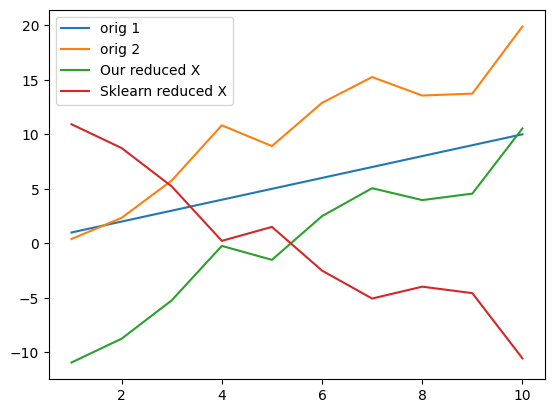

In [ ]:
plt.plot(X[0], X[0], label= 'orig 1')
plt.plot(X[0], X[1], label= 'orig 2')
plt.plot(X[0], Xnew, label= 'Our reduced X')
plt.plot(X[0], XPCAreduced, label= 'Sklearn reduced X')
plt.legend()
plt.show()

# **Лаба 5**

## **Задание 1**

In [ ]:
def make_grid_sample(d = 1, N = 25):
    xx, yy = np.meshgrid(np.linspace(-d, d, N),
                         np.linspace(-d, d, N))
    z =  np.vstack([xx.ravel(), yy.ravel()]).T
    r = pd.DataFrame(np.vstack([z, z]),columns=['X1','X2'])
    r['Y'] = (2*r.index>=r.shape[0]).astype(int)
    return r

df = make_grid_sample()
df

,X1,X2,Y
0,-1.000000,-1.0,0
1,-0.916667,-1.0,0
2,-0.833333,-1.0,0
3,-0.750000,-1.0,0
4,-0.666667,-1.0,0
...,...,...,...
1245,0.666667,1.0,1
1246,0.750000,1.0,1
1247,0.833333,1.0,1
1248,0.916667,1.0,1


In [ ]:
X = data[[2,4,10,11,12]]
y = (data[14]==' >50K').astype(int)
X, y = shuffle(X, y, random_state=0)
print(X.shape)
X

(32561, 5)


,2,4,10,11,12
22278,177119,10,0,0,44
8950,216481,13,0,0,40
7838,256263,12,0,0,40
16505,147640,3,0,1902,40
19140,172822,7,0,2824,76
...,...,...,...,...,...
13123,33331,14,0,0,40
19648,98466,6,0,0,35
9845,45317,10,0,0,40
10799,215862,16,7688,0,45


In [ ]:
df['Y'].value_counts()

0    625
1    625
Name: Y, dtype: int64

In [ ]:
df['area'] = (df['X1']*df['X1'] - df['X1']*df['X2'] + df['X2']*df['X2'] < 0.7**2).astype(int)
df['weight'] = (df['Y']==df['area']).map(lambda x: 0.9 if x else 0.1)
df['area'].value_counts()

0    744
1    506
Name: area, dtype: int64

In [ ]:
df

,X1,X2,Y,area,weight
0,-1.000000,-1.0,0,0,0.9
1,-0.916667,-1.0,0,0,0.9
2,-0.833333,-1.0,0,0,0.9
3,-0.750000,-1.0,0,0,0.9
4,-0.666667,-1.0,0,0,0.9
...,...,...,...,...,...
1245,0.666667,1.0,1,0,0.1
1246,0.750000,1.0,1,0,0.1
1247,0.833333,1.0,1,0,0.1
1248,0.916667,1.0,1,0,0.1


In [ ]:
#clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0).fit(df[['X1','X2']],df['Y'],sample_weight=df['weight'])
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0).fit(X,y)

In [ ]:
#(clf.predict(df[['X1','X2']])==df['Y']).sum()/df['Y'].shape[0]
(clf.predict(X)==y).sum()/y.shape[0]

0.8307791529744173

## **Задание 2**

In [ ]:
#skmet.precision_score(df['Y'],clf.predict(df[['X1','X2']]))
skmet.precision_score(y,clf.predict(X))

0.8350100603621731

In [ ]:
#skmet.recall_score(df['Y'],clf.predict(df[['X1','X2']]))
skmet.recall_score(y,clf.predict(X))

0.37048845810483355

In [ ]:
#skmet.jaccard_score(df['Y'],clf.predict(df[['X1','X2']]))
skmet.jaccard_score(y,clf.predict(X))

0.3452168746286393

## **Задание 3-4**

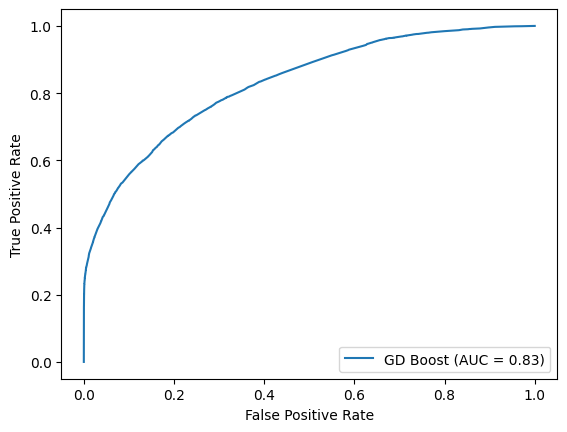

In [ ]:
y_score = clf.decision_function(X)
fpr, tpr, thresholds = skmet.roc_curve(y, y_score)

roc_auc = skmet.auc(fpr, tpr)
display = skmet.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='GD Boost')
display.plot()
plt.show()

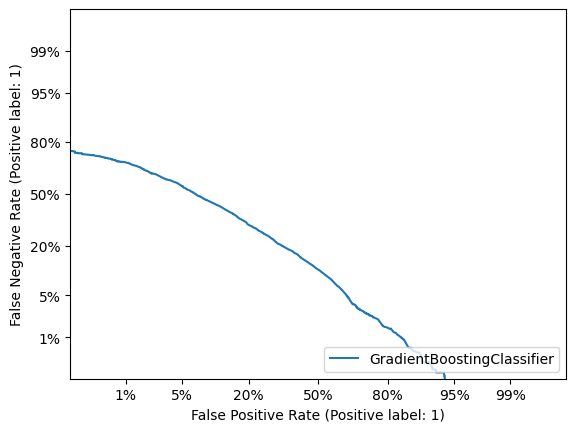

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

clftrain = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train,y_train)
skmet.DetCurveDisplay.from_estimator(clftrain, X_test, y_test)
plt.show()

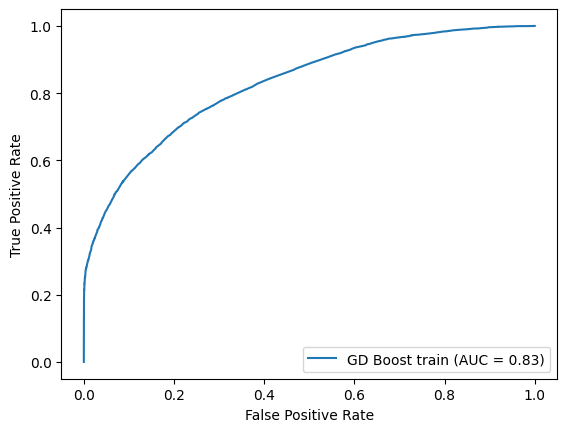

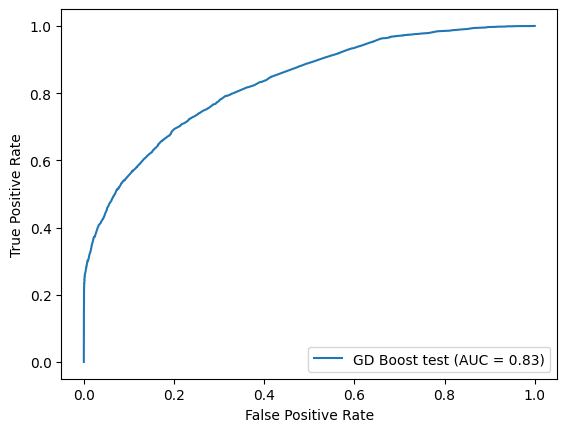

In [ ]:
y_score_train = clftrain.decision_function(X_train)
fpr, tpr, thresholds = skmet.roc_curve(y_train, y_score_train)

roc_auc = skmet.auc(fpr, tpr)
displaytrain = skmet.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='GD Boost train')
displaytrain.plot()

y_score = clftrain.decision_function(X_test)
fpr, tpr, thresholds = skmet.roc_curve(y_test, y_score)

roc_auc = skmet.auc(fpr, tpr)
displaytest = skmet.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='GD Boost test')
displaytest.plot()

plt.show()

In [ ]:
def crossval(X,y,model,n_splits):
    kf = KFold(n_splits)
    q_cv = np.zeros(X.shape[0])
    fprscor = []
    tprscor = []
    tresholds = []
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        clf = model.fit(X_train,y_train)
        y_score_train = clftrain.decision_function(X_train)
        fpr, tpr, tsh= skmet.roc_curve(y_train, y_score_train)
        fprscor.append(fpr)
        tprscor.append(tpr)
        tresholds.append(tsh)
    return np.array(fprscor), np.array(tprscor), np.array(tresholds)

In [ ]:
fpr, tpr, thresholds = crossval(X,y,clf,5)
fpr = fpr[:len(tpr)]
roc_auc = skmet.auc(fpr, tpr)
displaycsv = skmet.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='GD Boost crossval')
displaycsv.plot()

plt.show()

<ipython-input-62-343f3fddf716>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(fprscor), np.array(tprscor), np.array(tresholds)


ValueError: ignored

## **Задание 5**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


clf1 = AdaBoostClassifier(GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0
                                )).fit(X.to_numpy(),y.to_numpy())

clf2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0
                                 ,loss='exponential'
                                ).fit(X,y)

clf3 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0
                                 ,loss='log_loss'
                                ).fit(X,y)

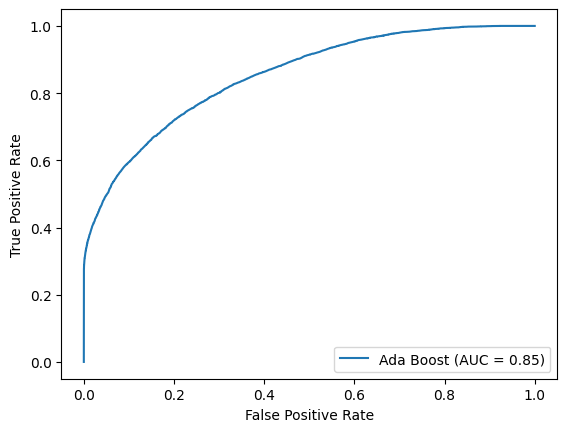

In [ ]:
y_score = clf1.decision_function(X)
fpr, tpr, thresholds = skmet.roc_curve(y, y_score)

roc_auc = skmet.auc(fpr, tpr)
display = skmet.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Ada Boost')
display.plot()
plt.show()

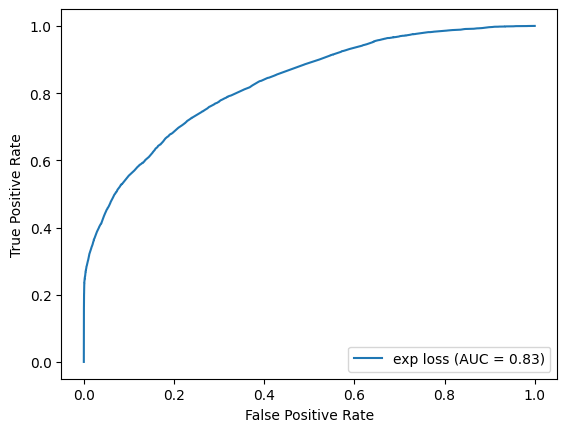

In [ ]:
y_score = clf2.decision_function(X)
fpr, tpr, thresholds = skmet.roc_curve(y, y_score)

roc_auc = skmet.auc(fpr, tpr)
display = skmet.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='exp loss')
display.plot()
plt.show()

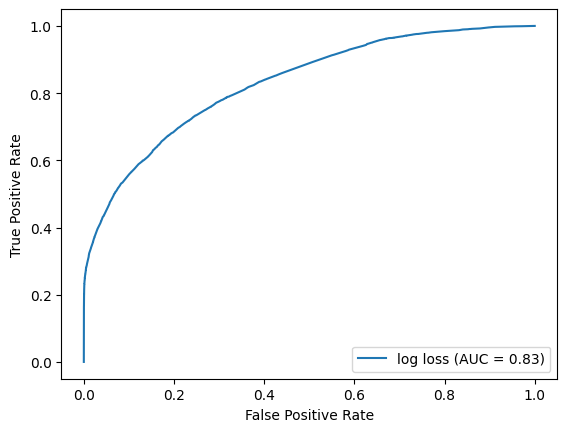

In [ ]:
y_score = clf3.decision_function(X)
fpr, tpr, thresholds = skmet.roc_curve(y, y_score)

roc_auc = skmet.auc(fpr, tpr)
display = skmet.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='log loss')
display.plot()
plt.show()